# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [34]:
# you are free to use any package you deem fit
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings
warnings.filterwarnings('ignore') 


## Dataset

In [2]:
# DO NOT MODIFY
from sklearn.datasets import make_moons
X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

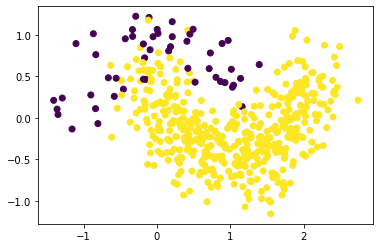

In [3]:
plt.scatter(x=X[:,0],y =X[:,1],c=Y)

## Training

In [4]:
# test train split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=9)

In [9]:
knc = KNeighborsClassifier(n_neighbors =3)
knc.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_preds = knc.predict(X_train)

In [11]:
accuracy_score(Y_train,y_preds)

0.975

In [12]:
confusion_matrix(Y_train,y_preds)

array([[ 31,   7],
       [  3, 359]])

## Testing / Optimization

In [51]:
y_tpreds = knc.predict(X_test)
accuracy_score(Y_test,y_tpreds)

0.96

In [18]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [58]:
# define the parameter values that should be searched
k_range = list(range(1, 20,2))
# Another parameter besides k that we might vary is the weights parameters
weight_options = ['uniform', 'distance']  
# Selecting algos
algo = ['ball_tree', 'kd_tree', 'brute']
#Selecting Leaf_size
leaf =  list(range(1, 100))
#Selecting distance type
p_range =  list(range(1, 4))
param_dist = dict(n_neighbors=k_range, weights=weight_options,algorithm = algo,leaf_size = leaf,p =p_range)


In [59]:
rand = RandomizedSearchCV(knc, param_dist, cv=10, scoring='f1', n_iter=100, random_state=5)

# fit
rand.fit(X_train, Y_train)

# scores
rand.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=49, n_neighbors=11, p=3,
                     weights='distance')

## Performance Analysis

In [60]:
best_knc = rand.best_estimator_

In [61]:
best_knc.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=49, n_neighbors=11, p=3,
                     weights='distance')

In [62]:
y_preds = best_knc.predict(X_train)
accuracy_score(Y_train,y_preds)

1.0

In [63]:
y_tpreds = best_knc.predict(X_test)
accuracy_score(Y_test,y_tpreds)

0.95